Create two random data sets with two features and two classes

Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

Consider that you are given a car height and you have the class label as 1 if cost of car is greater than 550 and 0 if it is less than or equal to 550.

In [ ]:
data = pd.read_csv('Data.csv').to_numpy()

# Create the labels from the data

In [ ]:
label = []
x_c1 = []
x_c2 = []
total=[]
c1_count = 0
c2_count = 0
for i in range(data.shape[0]):
  if(data[i][1] > 550):
    label.append(1)
    x_c1.append(data[i][0])
    c1_count += 1
  else:
    label.append(0)
    x_c2.append(data[i][0])
    c2_count += 1
  total.append(data[i][0])

total.sort()
t = list(set(total))

t.sort()
x_c1.sort()
x_c2.sort()

# Plotting the distribution of samples.

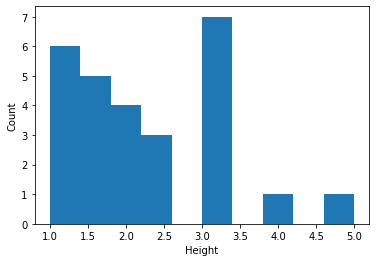

In [ ]:
x = data[:,0]
plt.hist(x)
plt.xlabel("Height")
plt.ylabel("Count")
plt.show()

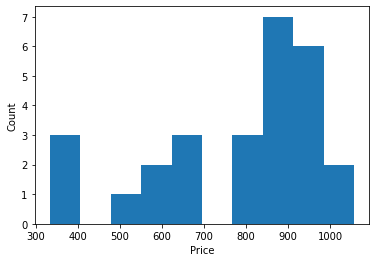

In [ ]:
x = data[:,1]
plt.hist(x)
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

# Prior Probabilities for both the classes

In [ ]:
no_of_samples = len(data)
prob_c1 = c1_count/no_of_samples
prob_c2 = c2_count/no_of_samples
print("Prior Class 1:",prob_c1)
print("Prior Class 2:",prob_c2)

Prior Class 1: 0.8518518518518519
Prior Class 2: 0.14814814814814814


# Unique Values

In [ ]:
from collections import Counter
unique_c1 = Counter(x_c1).keys() 
count_unique_c1 = list(Counter(x_c1).values()) 
unique_c2 = Counter(x_c2).keys() 
count_unique_c2 = list(Counter(x_c2).values()) 

Plot the count of each unique element of the feature

In [ ]:
print(unique_c2)
unique_c1

dict_keys([1.0, 2.5, 3.0, 5.0])


dict_keys([1.0, 1.5, 2.0, 2.5, 3.0, 4.0])

In [ ]:
print(count_unique_c2)
count_unique_c1

[1, 1, 1, 1]


[5, 5, 4, 2, 6, 1]

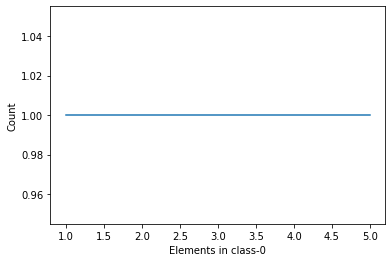

In [ ]:
sns.lineplot(list(unique_c2),count_unique_c2)
plt.xlabel("Elements in class-0")
plt.ylabel("Count")
plt.show()

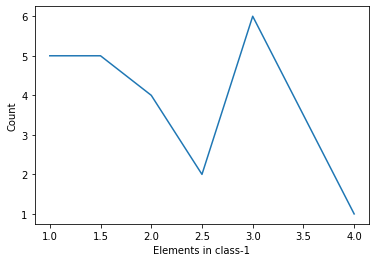

In [ ]:
sns.lineplot(list(unique_c1),count_unique_c1)
plt.xlabel("Elements in class-1")
plt.ylabel("Count")
plt.show()

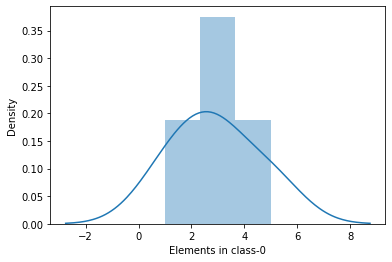

In [ ]:
sns.distplot(x_c2)
plt.xlabel("Elements in class-0")
plt.show()

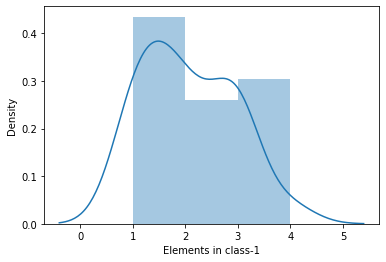

In [ ]:
sns.distplot(x_c1)
plt.xlabel("Elements in class-1")
plt.show()

# Likelihood

Plot P(x|C1) and P(x|C2)

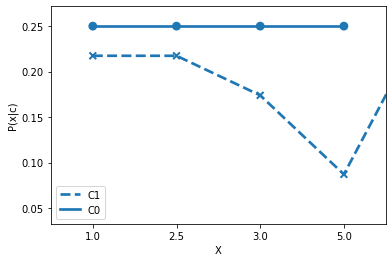

In [ ]:
y1 = np.array(count_unique_c1)/len(x_c1)
sns.pointplot(list(unique_c1),y1, linestyles="--",markers =['x'])
y2 = np.array(count_unique_c2)/len(x_c2)
sns.pointplot(list(unique_c2),y2,linestyles='-',markers=['o'])
plt.xlabel("X")
plt.ylabel("P(x|c)")
plt.legend(labels = ['C1','C0'])
plt.show()

In [ ]:
p1 = prob_c1 * y1
p2 = prob_c2 * y2

# Posterior Probability

In [ ]:
uc1 = list(unique_c1)
uc2 = list(unique_c2)
for i in t:
  cc1=0
  cc2=0
  if uc1.count(i)==1 and uc2.count(i)==1:
    cc1 = y1[uc1.index(i)]*prob_c1
    cc2 = y2[uc2.index(i)]*prob_c2
    evidence = cc1 + cc2
    p1[uc1.index(i)]/=evidence
    p2[uc2.index(i)]/=evidence
  else:
    if uc1.count(i)==1:
      cc1 = y1[uc1.index(i)]*prob_c1
      p1[uc1.index(i)]/=cc1
    else:
      cc2 = y2[uc2.index(i)]*prob_c2
      p2[uc2.index(i)]/=cc2

In [ ]:
print(p1)
print(p2)

Plot P(C1|x) and P(C2|x)

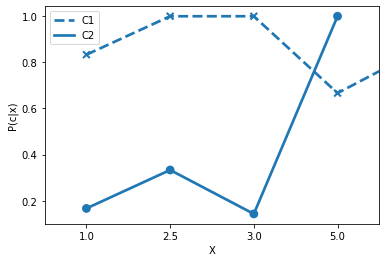

In [ ]:
sns.pointplot(list(unique_c1),p1, linestyles="--",markers =['x'] )
sns.pointplot(list(unique_c2),p2,linestyles='-',markers=['o'])
plt.xlabel("X")
plt.ylabel("P(c|x)")
plt.legend(labels = ['C1','C2'])
plt.show()

# Dataset 2

Read dataset. c1 contains two features of class 1 and c2 contains the two features for class 2. 

In [ ]:
class1_t1 = pd.read_csv('/content/c1.csv')
class2_t2 = pd.read_csv('/content/c2.csv')

class1_train = class1_t1.to_numpy()
class2_train = class2_t2.to_numpy()

ct3 = pd.DataFrame()
ct3 = pd.concat([class1_t1,class2_t2],axis=0)
ct3 = ct3.reset_index()

cx1 = pd.cut(ct3["x1"],right=False,bins=8,labels=[1,2,3,4,5,6,7,8])
cx2 = pd.cut(ct3["x2"],right=False,bins=8,labels=[1,2,3,4,5,6,7,8])

class1_train11 = pd.DataFrame()
class2_train22 = pd.DataFrame()
class1_train11["x1"] = cx1.iloc[:159]
class1_train11["x2"] = cx2.iloc[:159]
class2_train22["x1"] = cx1.iloc[160:]
class2_train22["x2"] = cx2.iloc[160:]

ct3['class']=pd.Series()
ct3['class'].iloc[:159]=1
ct3['class'].iloc[160:]=2

class1_train1 = class1_train11.to_numpy()
class2_train2 = class2_train22.to_numpy()

Print the data

In [ ]:
print(class1_train.shape)
print(class1_train)
print(type(class2_train))
print(class2_train.shape)
print(type(class1_train))
print(class2_train)

(160, 2)
[[ 3.20478053e-01  4.81092097e-01]
 [ 5.06909985e-02  9.63995041e-02]
 [ 3.74846984e+00  4.03931041e-01]
 [ 2.25637447e+00  2.08996208e+00]
 [ 1.42145382e+00  1.24362901e+00]
 [ 4.08062705e-01  9.24810050e-01]
 [ 1.60681941e+00  4.75268430e-01]
 [ 1.57397678e+00  1.60394699e+00]
 [ 1.73121450e+00  2.43452464e+00]
 [ 9.30696141e-01  2.12345759e-01]
 [ 1.43750641e+00 -2.84913595e-01]
 [-4.91480512e-01  2.70506180e-01]
 [ 2.35052206e+00  2.34923853e+00]
 [ 1.06032568e+00  2.25909849e-01]
 [ 2.23321779e+00  1.18800751e+00]
 [-3.36602971e-01  8.26100949e-01]
 [ 1.21051794e+00  3.59324046e-01]
 [ 1.95878231e+00  2.81435856e+00]
 [ 5.35856323e-01 -1.54336636e-01]
 [ 2.89423945e+00  1.71311383e+00]
 [ 1.38569352e+00  1.74692600e+00]
 [ 1.27854113e+00 -3.70841388e-01]
 [-9.07354159e-02  2.42044784e+00]
 [ 9.07143282e-01  5.69730755e-01]
 [ 2.28848082e+00  1.68559588e+00]
 [-1.53479431e-01 -3.95808482e-01]
 [ 2.40208659e+00  4.41623125e-01]
 [ 1.21455553e+00  1.51675544e+00]
 [ 3.150590

# Plotting the distribution of samples.

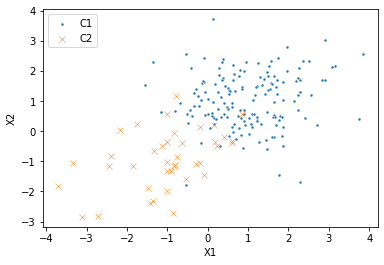

In [ ]:
import seaborn as sns
sns.scatterplot(class1_train[:,0],class1_train[:,1],marker='.')
sns.scatterplot(class2_train[:,0],class2_train[:,1],marker='x')
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend(labels = ['C1','C2'])
plt.show()

Determine Prior Probabilities

In [ ]:
no_of_samples = len(class1_train)+len(class2_train)

In [ ]:
prob_c1 = len(class1_train)/no_of_samples
prob_c1

0.8040201005025126

In [ ]:
prob_c2 = len(class2_train)/no_of_samples
prob_c2

0.19597989949748743

Plotting the prior

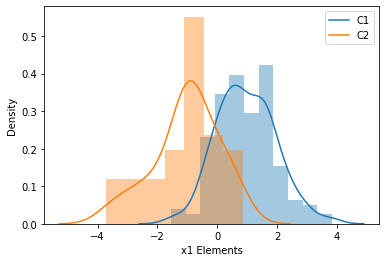

In [ ]:
sns.distplot(class1_train[:,0])
sns.distplot(class2_train[:,0])
plt.xlabel("x1 Elements")
plt.legend(labels = ['C1','C2'])
plt.show()

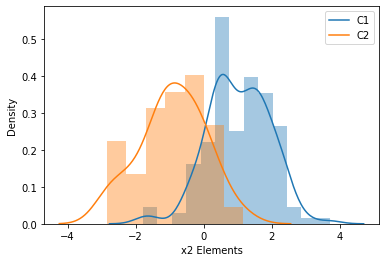

In [ ]:
sns.distplot(class1_train[:,1])
sns.distplot(class2_train[:,1])
plt.xlabel("x2 Elements")
plt.legend(labels = ['C1','C2'])
plt.show()

Plot the histogram of C1

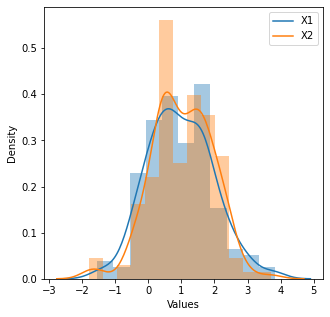

In [ ]:
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(5)
sns.distplot(class1_train[:,0])
sns.distplot(class1_train[:,1])
plt.xlabel("Values")
plt.legend(labels = ['X1','X2'])
plt.show()

Plot the histogram of C2

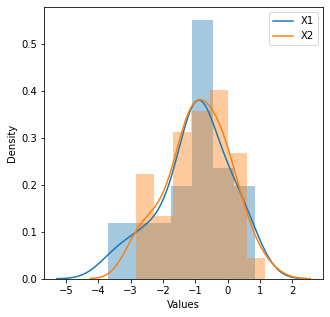

In [ ]:
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(5)
sns.distplot(class2_train[:,0])
sns.distplot(class2_train[:,1])
plt.xlabel("Values")
plt.legend(labels = ['X1','X2'])
plt.show()

Plot the data distribution and the histogram of feature 1 and feature 2 in the x axis and the y -axis respectively. The distribution of feature 1 wil be along the top of the x-axis and feature 2 along the right of the y axis.

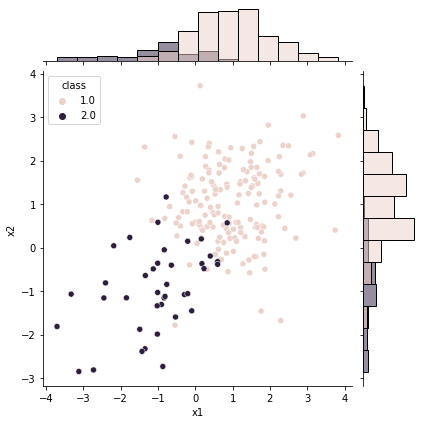

In [ ]:
g = sns.JointGrid(x='x1',y='x2',hue ='class',data=ct3)
g.plot(sns.scatterplot,sns.histplot)

In [ ]:
from collections import Counter
x1_c1 = class1_train1[:,0]
unique1_c1 = Counter(x1_c1).keys() 
count_unique1_c1 = list(Counter(x1_c1).values()) 
x1_c2 = class2_train2[:,0]
unique1_c2 = Counter(x1_c2).keys() 
count_unique1_c2 = list(Counter(x1_c2).values())
x2_c1 = class1_train1[:,1]
unique2_c1 = Counter(x2_c1).keys() 
count_unique2_c1 = list(Counter(x2_c1).values()) 
x2_c2 = class2_train2[:,1]
unique2_c2 = Counter(x2_c2).keys() 
count_unique2_c2 = list(Counter(x2_c2).values())

x1_t = list(set(list(x1_c1)+list(x1_c2)))
x1_t.sort()
x2_t = list(set(list(x2_c1)+list(x2_c2)))
x2_t.sort()

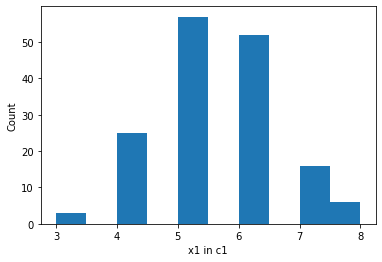

In [ ]:
plt.hist(x1_c1)
plt.xlabel("x1 in c1")
plt.ylabel("Count")
plt.show()

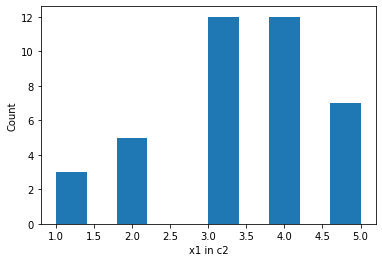

In [ ]:
plt.hist(x1_c2)
plt.xlabel("x1 in c2")
plt.ylabel("Count")
plt.show()

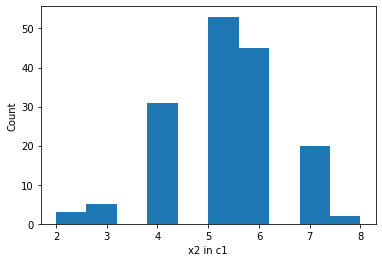

In [ ]:
plt.hist(x2_c1)
plt.xlabel("x2 in c1")
plt.ylabel("Count")
plt.show()

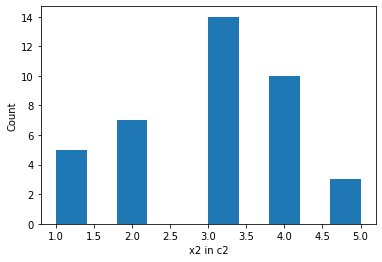

In [ ]:
plt.hist(x2_c2)
plt.xlabel("x2 in c2")
plt.ylabel("Count")
plt.show()

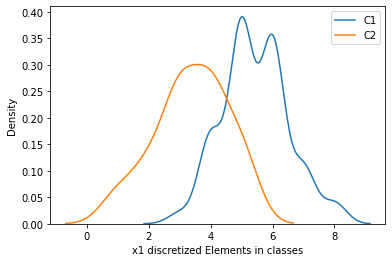

In [ ]:
sns.distplot(x1_c1,hist=False)
sns.distplot(x1_c2,hist=False)
plt.xlabel("x1 discretized Elements in classes")
plt.legend(labels = ['C1','C2'])
plt.show()

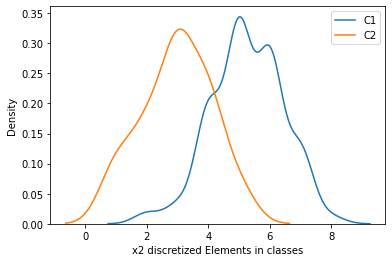

In [ ]:
sns.distplot(x2_c1,hist=False)
sns.distplot(x2_c2,hist=False)
plt.xlabel("x2 discretized Elements in classes")
plt.legend(labels = ['C1','C2'])
plt.show()

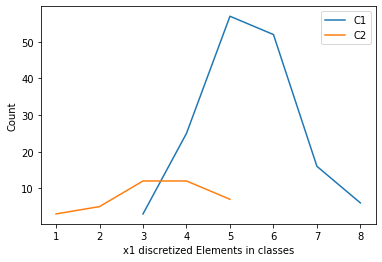

In [ ]:
sns.lineplot(list(unique1_c1),count_unique1_c1)
sns.lineplot(list(unique1_c2),count_unique1_c2)
plt.xlabel("x1 discretized Elements in classes")
plt.legend(labels = ['C1','C2'])
plt.ylabel("Count")
plt.show()

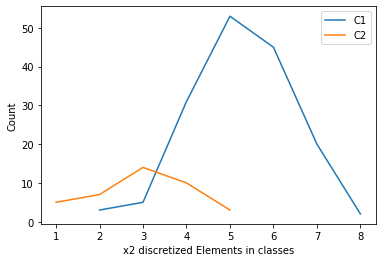

In [ ]:
sns.lineplot(list(unique2_c1),count_unique2_c1)
sns.lineplot(list(unique2_c2),count_unique2_c2)
plt.xlabel("x2 discretized Elements in classes")
plt.legend(labels = ['C1','C2'])
plt.ylabel("Count")
plt.show()

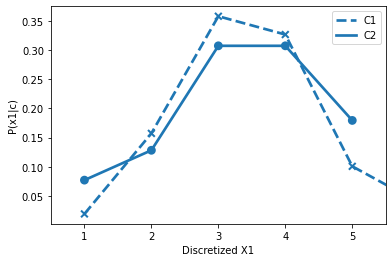

In [ ]:
y11 = np.array(count_unique1_c1)/len(x1_c1)
sns.pointplot(list(unique1_c1),y11, linestyles="--",markers =['x'] )
y12 = np.array(count_unique1_c2)/len(x1_c2)
sns.pointplot(list(unique1_c2),y12,linestyles='-',markers=['o'])
plt.xlabel("Discretized X1")
plt.ylabel("P(x1|c)")
plt.legend(labels = ['C1','C2'])
plt.show()

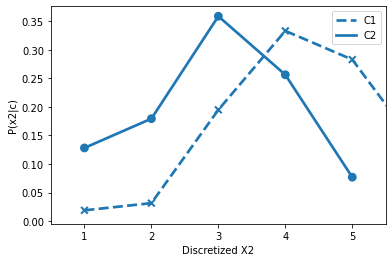

In [ ]:
y21 = np.array(count_unique2_c1)/len(x2_c1)
sns.pointplot(list(unique2_c1),y21, linestyles="--",markers =['x'] )
y22 = np.array(count_unique2_c2)/len(x2_c2)
sns.pointplot(list(unique2_c2),y22,linestyles='-',markers=['o'])
plt.xlabel("Discretized X2")
plt.ylabel("P(x2|c)")
plt.legend(labels = ['C1','C2'])
plt.show()

In [ ]:
num11 = y11*prob_c1
num12 = y12*prob_c2
num21 = y21*prob_c1
num22 = y22*prob_c2

# Plot the Posterior Probability for each class

In [ ]:
uc11 = list(unique1_c1)
uc12 = list(unique1_c2)
uc21 = list(unique2_c1)
uc22 = list(unique2_c2)

for i in x1_t:
  c11=0
  c12=0
  if uc11.count(i)==1 and uc12.count(i)==1:
    c11 = y11[uc11.index(i)]*prob_c1
    c12 = y12[uc12.index(i)]*prob_c2
    evidence = c11+c12
    num11[uc11.index(i)]/=evidence
    num12[uc12.index(i)]/=evidence
  else:
    if uc11.count(i)==1:
      c11 = y11[uc11.index(i)]*prob_c1
      num11[uc11.index(i)]/=c11
    else:
      c12 = y12[uc12.index(i)]*prob_c2
      num12[uc12.index(i)]/=c12

for i in x2_t:
  c21=0
  c22=0
  if uc21.count(i)==1 and uc22.count(i)==1:
    c21 = y21[uc21.index(i)]*prob_c1
    c22 = y22[uc22.index(i)]*prob_c2
    evidence = c21+c22
    num21[uc21.index(i)]/=evidence
    num22[uc22.index(i)]/=evidence
  else:
    if uc21.count(i)==1:
      c21 = y21[uc21.index(i)]*prob_c1
      num21[uc21.index(i)]/=c21
    else:
      c22 = y22[uc22.index(i)]*prob_c2
      num22[uc22.index(i)]/=c22

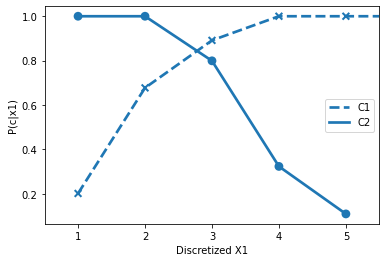

In [ ]:
sns.pointplot(list(unique1_c1),num11, linestyles="--",markers =['x'] )
sns.pointplot(list(unique1_c2),num12,linestyles='-',markers=['o'])
plt.xlabel("Discretized X1")
plt.ylabel("P(c|x1)")
plt.legend(labels = ['C1','C2'])
plt.show()

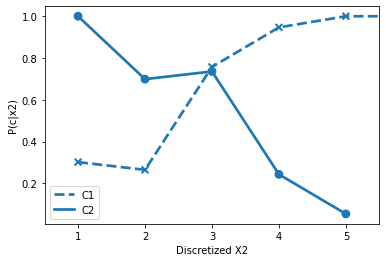

In [ ]:
sns.pointplot(list(unique2_c1),num21, linestyles="--",markers =['x'] )
sns.pointplot(list(unique2_c2),num22,linestyles='-',markers=['o'])
plt.xlabel("Discretized X2")
plt.ylabel("P(c|x2)")
plt.legend(labels = ['C1','C2'])
plt.show()

#**IRIS Dataset Visualisations**

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

iris= pd.read_csv('/content/Iris.csv')
features = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
pre_process = OrdinalEncoder()
iris['Species'] = pre_process.fit_transform(iris[['Species']])

c00 = iris.iloc[:50].to_numpy()
c01 = iris.iloc[51:100].to_numpy()
c02 = iris.iloc[101:].to_numpy()

for i in features:
  iris[i]=pd.cut(iris[i],bins = 8,right = False,labels = [1,2,3,4,5,6,7,8])

c0 = iris.iloc[:50].to_numpy()
c1 = iris.iloc[51:100].to_numpy()
c2 = iris.iloc[101:].to_numpy()

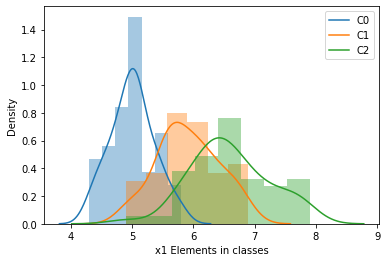

In [ ]:
sns.distplot(c00[:,1])
sns.distplot(c01[:,1])
sns.distplot(c02[:,1])
plt.xlabel("x1 Elements in classes")
plt.legend(labels = ['C0','C1','C2'])
plt.show()

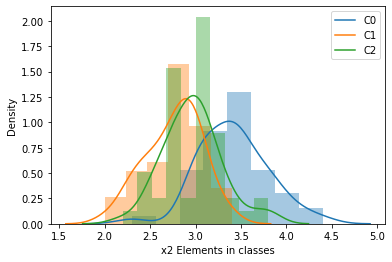

In [ ]:
sns.distplot(c00[:,2])
sns.distplot(c01[:,2])
sns.distplot(c02[:,2])
plt.xlabel("x2 Elements in classes")
plt.legend(labels = ['C0','C1','C2'])
plt.show()

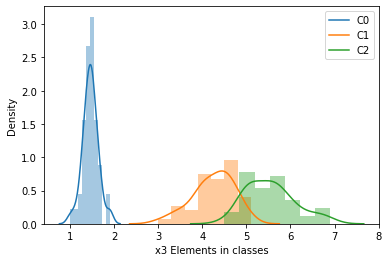

In [ ]:
sns.distplot(c00[:,3])
sns.distplot(c01[:,3])
sns.distplot(c02[:,3])
plt.xlabel("x3 Elements in classes")
plt.legend(labels = ['C0','C1','C2'])
plt.show()

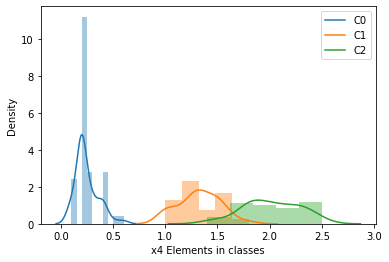

In [ ]:
sns.distplot(c00[:,4])
sns.distplot(c01[:,4])
sns.distplot(c02[:,4])
plt.xlabel("x4 Elements in classes")
plt.legend(labels = ['C0','C1','C2'])
plt.show()

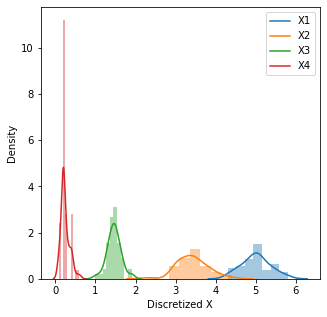

In [ ]:
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(5)
sns.distplot(c00[:,1])
sns.distplot(c00[:,2])
sns.distplot(c00[:,3])
sns.distplot(c00[:,4])
plt.xlabel("Discretized X")
plt.legend(labels = ['X1','X2','X3','X4'])
plt.show()

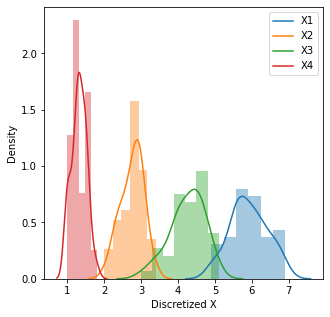

In [ ]:
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(5)
sns.distplot(c01[:,1])
sns.distplot(c01[:,2])
sns.distplot(c01[:,3])
sns.distplot(c01[:,4])
plt.xlabel("Discretized X")
plt.legend(labels = ['X1','X2','X3','X4'])
plt.show()

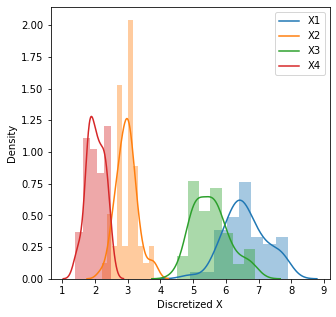

In [ ]:
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(5)
sns.distplot(c02[:,1])
sns.distplot(c02[:,2])
sns.distplot(c02[:,3])
sns.distplot(c02[:,4])
plt.xlabel("Discretized X")
plt.legend(labels = ['X1','X2','X3','X4'])
plt.show()

In [ ]:
x1_c0 = c0[:,1]
unique1_c0 = list(Counter(x1_c0).keys()) 
count_unique1_c0 = list(Counter(x1_c0).values()) 
x2_c0 = c0[:,2]
unique2_c0 = list(Counter(x2_c0).keys()) 
count_unique2_c0 = list(Counter(x2_c0).values())
x3_c0 = c0[:,3]
unique3_c0 = list(Counter(x3_c0).keys()) 
count_unique3_c0 = list(Counter(x3_c0).values()) 
x4_c0 = c0[:,4]
unique4_c0 = list(Counter(x4_c0).keys()) 
count_unique4_c0 = list(Counter(x4_c0).values())

x1_c1 = c1[:,1]
unique1_c1 = list(Counter(x1_c1).keys()) 
count_unique1_c1 = list(Counter(x1_c1).values()) 
x2_c1 = c1[:,2]
unique2_c1 = list(Counter(x2_c1).keys()) 
count_unique2_c1 = list(Counter(x2_c1).values())
x3_c1 = c1[:,3]
unique3_c1 = list(Counter(x3_c1).keys()) 
count_unique3_c1 = list(Counter(x3_c1).values()) 
x4_c1 = c1[:,4]
unique4_c1 = list(Counter(x4_c1).keys()) 
count_unique4_c1 = list(Counter(x4_c1).values())

x1_c2 = c2[:,1]
unique1_c2 = list(Counter(x1_c2).keys()) 
count_unique1_c2 = list(Counter(x1_c2).values()) 
x2_c2 = c2[:,2]
unique2_c2 = list(Counter(x2_c2).keys()) 
count_unique2_c2 = list(Counter(x2_c2).values())
x3_c2 = c2[:,3]
unique3_c2 = list(Counter(x3_c2).keys()) 
count_unique3_c2 = list(Counter(x3_c2).values()) 
x4_c2 = c2[:,4]
unique4_c2 = list(Counter(x4_c2).keys()) 
count_unique4_c2 = list(Counter(x4_c2).values())

x1_tt = list(set(list(x1_c0)+list(x1_c1)+list(x1_c2)))
x1_tt.sort()
x2_tt = list(set(list(x2_c0)+list(x2_c1)+list(x2_c2)))
x2_tt.sort()
x3_tt = list(set(list(x3_c0)+list(x3_c1)+list(x3_c2)))
x3_tt.sort()
x4_tt = list(set(list(x4_c0)+list(x4_c1)+list(x4_c2)))
x4_tt.sort()

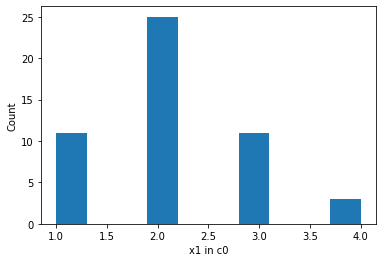

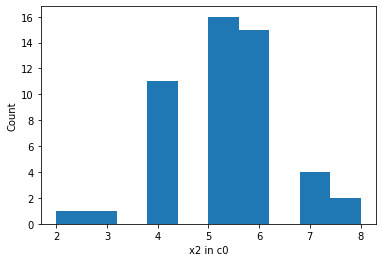

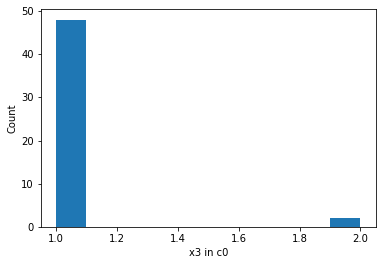

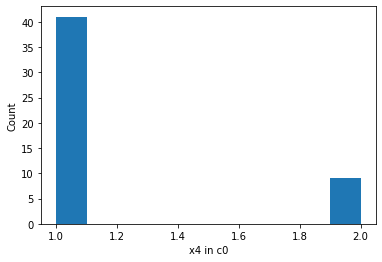

In [ ]:
plt.hist(x1_c0)
plt.xlabel("x1 in c0")
plt.ylabel("Count")
plt.show()

plt.hist(x2_c0)
plt.xlabel("x2 in c0")
plt.ylabel("Count")
plt.show()

plt.hist(x3_c0)
plt.xlabel("x3 in c0")
plt.ylabel("Count")
plt.show()

plt.hist(x4_c0)
plt.xlabel("x4 in c0")
plt.ylabel("Count")
plt.show()

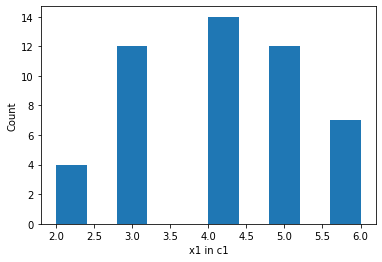

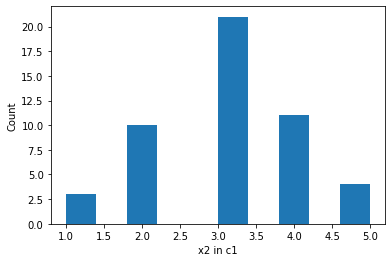

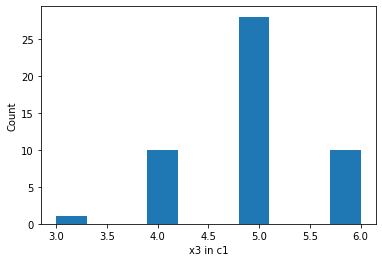

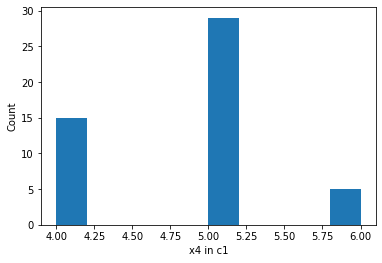

In [ ]:
plt.hist(x1_c1)
plt.xlabel("x1 in c1")
plt.ylabel("Count")
plt.show()

plt.hist(x2_c1)
plt.xlabel("x2 in c1")
plt.ylabel("Count")
plt.show()

plt.hist(x3_c1)
plt.xlabel("x3 in c1")
plt.ylabel("Count")
plt.show()

plt.hist(x4_c1)
plt.xlabel("x4 in c1")
plt.ylabel("Count")
plt.show()

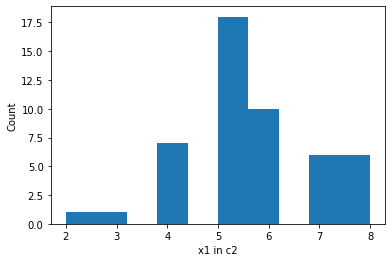

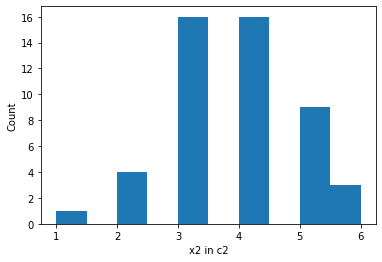

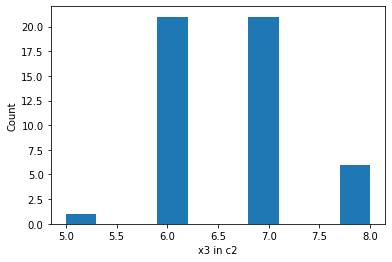

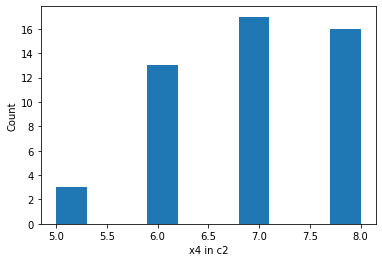

In [ ]:
plt.hist(x1_c2)
plt.xlabel("x1 in c2")
plt.ylabel("Count")
plt.show()

plt.hist(x2_c2)
plt.xlabel("x2 in c2")
plt.ylabel("Count")
plt.show()

plt.hist(x3_c2)
plt.xlabel("x3 in c2")
plt.ylabel("Count")
plt.show()

plt.hist(x4_c2)
plt.xlabel("x4 in c2")
plt.ylabel("Count")
plt.show()

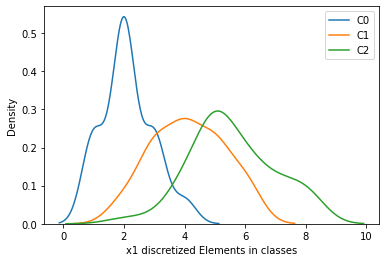

In [ ]:
sns.distplot(x1_c0,hist=False)
sns.distplot(x1_c1,hist=False)
sns.distplot(x1_c2,hist=False)
plt.xlabel("x1 discretized Elements in classes")
plt.legend(labels = ['C0','C1','C2'])
plt.show()

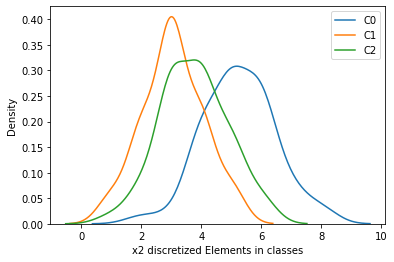

In [ ]:
sns.distplot(x2_c0,hist=False)
sns.distplot(x2_c1,hist=False)
sns.distplot(x2_c2,hist=False)
plt.xlabel("x2 discretized Elements in classes")
plt.legend(labels = ['C0','C1','C2'])
plt.show()

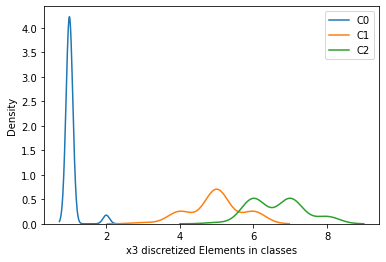

In [ ]:
sns.distplot(x3_c0,hist=False)
sns.distplot(x3_c1,hist=False)
sns.distplot(x3_c2,hist=False)
plt.xlabel("x3 discretized Elements in classes")
plt.legend(labels = ['C0','C1','C2'])
plt.show()

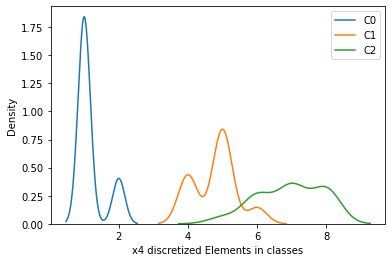

In [ ]:
sns.distplot(x4_c0,hist=False)
sns.distplot(x4_c1,hist=False)
sns.distplot(x4_c2,hist=False)
plt.xlabel("x4 discretized Elements in classes")
plt.legend(labels = ['C0','C1','C2'])
plt.show()

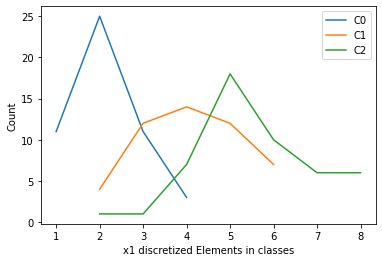

In [ ]:
sns.lineplot(list(unique1_c0),count_unique1_c0)
sns.lineplot(list(unique1_c1),count_unique1_c1)
sns.lineplot(list(unique1_c2),count_unique1_c2)
plt.xlabel("x1 discretized Elements in classes")
plt.ylabel("Count")
plt.legend(labels = ['C0','C1','C2'])
plt.show()

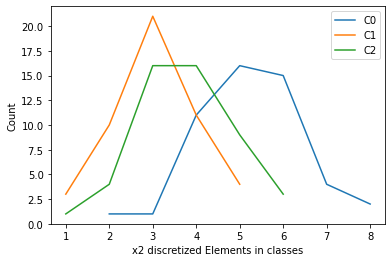

In [ ]:
sns.lineplot(list(unique2_c0),count_unique2_c0)
sns.lineplot(list(unique2_c1),count_unique2_c1)
sns.lineplot(list(unique2_c2),count_unique2_c2)
plt.xlabel("x2 discretized Elements in classes")
plt.ylabel("Count")
plt.legend(labels = ['C0','C1','C2'])
plt.show()

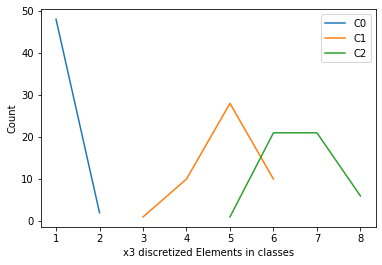

In [ ]:
sns.lineplot(list(unique3_c0),count_unique3_c0)
sns.lineplot(list(unique3_c1),count_unique3_c1)
sns.lineplot(list(unique3_c2),count_unique3_c2)
plt.xlabel("x3 discretized Elements in classes")
plt.ylabel("Count")
plt.legend(labels = ['C0','C1','C2'])
plt.show()

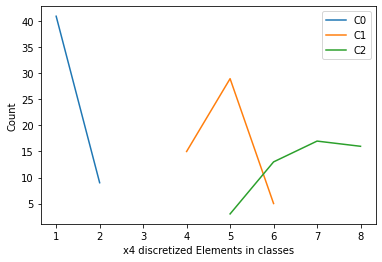

In [ ]:
sns.lineplot(list(unique4_c0),count_unique4_c0)
sns.lineplot(list(unique4_c1),count_unique4_c1)
sns.lineplot(list(unique4_c2),count_unique4_c2)
plt.xlabel("x4 discretized Elements in classes")
plt.ylabel("Count")
plt.legend(labels = ['C0','C1','C2'])
plt.show()

In [ ]:
n = iris.shape[0]

pc0 = len(c0)/n
pc1 = len(c1)/n
pc2 = len(c2)/n

In [ ]:
p1c0 = np.array(count_unique1_c0)/len(x1_c0)
p1c1 = np.array(count_unique1_c1)/len(x1_c1)
p1c2 = np.array(count_unique1_c2)/len(x1_c2)
p2c0 = np.array(count_unique2_c0)/len(x2_c0)
p2c1 = np.array(count_unique2_c1)/len(x2_c1)
p2c2 = np.array(count_unique2_c2)/len(x2_c2)
p3c0 = np.array(count_unique3_c0)/len(x3_c0)
p3c1 = np.array(count_unique3_c1)/len(x3_c1)
p3c2 = np.array(count_unique3_c2)/len(x3_c2)
p4c0 = np.array(count_unique4_c0)/len(x4_c0)
p4c1 = np.array(count_unique4_c1)/len(x4_c1)
p4c2 = np.array(count_unique4_c2)/len(x4_c2)

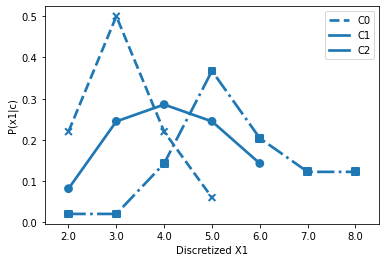

In [ ]:
sns.pointplot(list(unique1_c0),p1c0, linestyles="--",markers =['x'])
sns.pointplot(list(unique1_c1),p1c1,linestyles='-',markers=['o'])
sns.pointplot(list(unique1_c2),p1c2, linestyles="-.",markers =['s'] )
plt.xlabel("Discretized X1")
plt.ylabel("P(x1|c)")
plt.legend(labels = ['C0','C1','C2'])
plt.show()

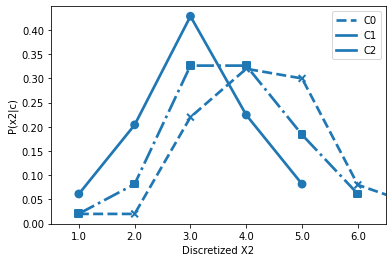

In [ ]:
sns.pointplot(list(unique2_c0),p2c0, linestyles="--",markers =['x'])
sns.pointplot(list(unique2_c1),p2c1,linestyles='-',markers=['o'])
sns.pointplot(list(unique2_c2),p2c2, linestyles="-.",markers =['s'] )
plt.xlabel("Discretized X2")
plt.ylabel("P(x2|c)")
plt.legend(labels = ['C0','C1','C2'])
plt.show()

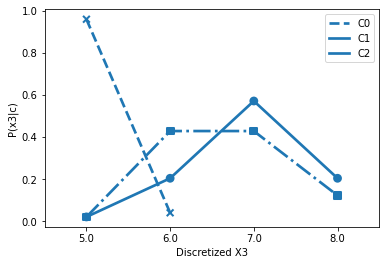

In [ ]:
sns.pointplot(list(unique3_c0),p3c0, linestyles="--",markers =['x'])
sns.pointplot(list(unique3_c1),p3c1,linestyles='-',markers=['o'])
sns.pointplot(list(unique3_c2),p3c2, linestyles="-.",markers =['s'] )
plt.xlabel("Discretized X3")
plt.ylabel("P(x3|c)")
plt.legend(labels = ['C0','C1','C2'])
plt.show()

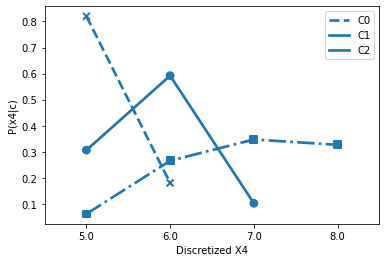

In [ ]:
sns.pointplot(list(unique4_c0),p4c0, linestyles="--",markers =['x'])
sns.pointplot(list(unique4_c1),p4c1,linestyles='-',markers=['o'])
sns.pointplot(list(unique4_c2),p4c2, linestyles="-.",markers =['s'] )
plt.xlabel("Discretized X4")
plt.ylabel("P(x4|c)")
plt.legend(labels = ['C0','C1','C2'])
plt.show()

In [ ]:
c0p1 = p1c0 * pc0
c0p2 = p2c0 * pc0
c0p3 = p3c0 * pc0
c0p4 = p4c0 * pc0
c1p1 = p1c1 * pc1
c1p2 = p2c1 * pc1
c1p3 = p3c1 * pc1
c1p4 = p4c1 * pc1
c2p1 = p1c2 * pc2
c2p2 = p2c2 * pc2
c2p3 = p3c2 * pc2
c2p4 = p4c2 * pc2

In [ ]:
for i in x1_tt:
  p0=0
  p1=0
  p2=0
  if unique1_c0.count(i)==1 and unique1_c1.count(i)==1 and unique1_c2.count(i)==1:
    p0 = p1c0[unique1_c0.index(i)]* pc0
    p1 = p1c1[unique1_c1.index(i)]* pc1
    p2 = p1c2[unique1_c2.index(i)]* pc2
    evidence = p0+p1+p2
    c0p1[unique1_c0.index(i)]/=evidence
    c1p1[unique1_c1.index(i)]/=evidence
    c2p1[unique1_c2.index(i)]/=evidence
  elif (unique1_c0.count(i)==1 and unique1_c1.count(i)==1) or (unique1_c1.count(i)==1 and unique1_c2.count(i)==1) or (unique1_c0.count(i)==1 and unique1_c2.count(i)==1):
    if (unique1_c0.count(i)==1 and unique1_c1.count(i)==1):
      p0 = p1c0[unique1_c0.index(i)]* pc0
      p1 = p1c1[unique1_c1.index(i)]* pc1
      evidence = p0+p1
      c0p1[unique1_c0.index(i)]/=evidence
      c1p1[unique1_c1.index(i)]/=evidence
    elif (unique1_c1.count(i)==1 and unique1_c2.count(i)==1):
      p1 = p1c1[unique1_c1.index(i)]* pc1
      p2 = p1c2[unique1_c2.index(i)]* pc2
      evidence = p1+p2
      c1p1[unique1_c1.index(i)]/=evidence
      c2p1[unique1_c2.index(i)]/=evidence
    else:
      p0 = p1c0[unique1_c0.index(i)]* pc0
      p2 = p1c2[unique1_c2.index(i)]* pc2
      evidence = p0+p2
      c0p1[unique1_c0.index(i)]/=evidence
      c2p1[unique1_c2.index(i)]/=evidence
  else:
    if unique1_c0.count(i)==1:
      p0 = p1c0[unique1_c0.index(i)]* pc0
      c0p1[unique1_c0.index(i)]/=p0
    elif unique1_c1.count(i)==1:
      p1 = p1c1[unique1_c1.index(i)]* pc1
      c1p1[unique1_c1.index(i)]/=p1
    else:
      p2 = p1c2[unique1_c2.index(i)]* pc2
      c2p1[unique1_c2.index(i)]/=p2

In [ ]:
for i in x2_tt:
  p0=0
  p1=0
  p2=0
  if unique2_c0.count(i)==1 and unique2_c1.count(i)==1 and unique2_c2.count(i)==1:
    p0 = p2c0[unique2_c0.index(i)]* pc0
    p1 = p2c1[unique2_c1.index(i)]* pc1
    p2 = p2c2[unique2_c2.index(i)]* pc2
    evidence = p0+p1+p2
    c0p2[unique2_c0.index(i)]/=evidence
    c1p2[unique2_c1.index(i)]/=evidence
    c2p2[unique2_c2.index(i)]/=evidence
  elif (unique2_c0.count(i)==1 and unique2_c1.count(i)==1) or (unique2_c1.count(i)==1 and unique2_c2.count(i)==1) or (unique2_c0.count(i)==1 and unique2_c2.count(i)==1):
    if (unique2_c0.count(i)==1 and unique2_c1.count(i)==1):
      p0 = p2c0[unique1_c0.index(i)]* pc0
      p1 = p2c1[unique1_c1.index(i)]* pc1
      evidence = p0+p1
      c0p2[unique2_c0.index(i)]/=evidence
      c1p2[unique2_c1.index(i)]/=evidence
    elif (unique2_c1.count(i)==1 and unique2_c2.count(i)==1):
      p1 = p2c1[unique2_c1.index(i)]* pc1
      p2 = p2c2[unique2_c2.index(i)]* pc2
      evidence = p1+p2
      c1p2[unique2_c1.index(i)]/=evidence
      c2p2[unique2_c2.index(i)]/=evidence
    else:
      p0 = p2c0[unique2_c0.index(i)]* pc0
      p2 = p2c2[unique2_c2.index(i)]* pc2
      evidence = p0+p2
      c0p2[unique2_c0.index(i)]/=evidence
      c2p2[unique2_c2.index(i)]/=evidence
  else:
    if unique2_c0.count(i)==1:
      p0 = p2c0[unique2_c0.index(i)]* pc0
      c0p2[unique2_c0.index(i)]/=p0
    elif unique2_c1.count(i)==1:
      p1 = p2c1[unique2_c1.index(i)]* pc1
      c1p2[unique2_c1.index(i)]/=p1
    else:
      p2 = p2c2[unique2_c2.index(i)]* pc2
      c2p2[unique2_c2.index(i)]/=p2

In [ ]:
for i in x3_tt:
  p0=0
  p1=0
  p2=0
  if unique3_c0.count(i)==1 and unique3_c1.count(i)==1 and unique3_c2.count(i)==1:
    p0 = p3c0[unique3_c0.index(i)]* pc0
    p1 = p3c1[unique3_c1.index(i)]* pc1
    p2 = p3c2[unique3_c2.index(i)]* pc2
    evidence = p0+p1+p2
    c0p3[unique3_c0.index(i)]/=evidence
    c1p3[unique3_c1.index(i)]/=evidence
    c2p3[unique3_c2.index(i)]/=evidence
  elif (unique3_c0.count(i)==1 and unique3_c1.count(i)==1) or (unique3_c1.count(i)==1 and unique3_c2.count(i)==1) or (unique3_c0.count(i)==1 and unique3_c2.count(i)==1):
    if (unique3_c0.count(i)==1 and unique3_c1.count(i)==1):
      p0 = p3c0[unique3_c0.index(i)]* pc0
      p1 = p3c1[unique3_c1.index(i)]* pc1
      evidence = p0+p1
      c0p3[unique3_c0.index(i)]/=evidence
      c1p3[unique3_c1.index(i)]/=evidence
    elif (unique3_c1.count(i)==1 and unique3_c2.count(i)==1):
      p1 = p3c1[unique3_c1.index(i)]* pc1
      p2 = p3c2[unique3_c2.index(i)]* pc2
      evidence = p1+p2
      c1p3[unique3_c1.index(i)]/=evidence
      c2p3[unique3_c2.index(i)]/=evidence
    else:
      p0 = p3c0[unique3_c0.index(i)]* pc0
      p2 = p3c2[unique3_c2.index(i)]* pc2
      evidence = p0+p2
      c0p3[unique3_c0.index(i)]/=evidence
      c2p3[unique3_c2.index(i)]/=evidence
  else:
    if unique3_c0.count(i)==1:
      p0 = p3c0[unique3_c0.index(i)]* pc0
      c0p3[unique3_c0.index(i)]/=p0
    elif unique3_c1.count(i)==1:
      p1 = p3c1[unique3_c1.index(i)]* pc1
      c1p3[unique3_c1.index(i)]/=p1
    else:
      p2 = p3c2[unique3_c2.index(i)]* pc2
      c2p3[unique3_c2.index(i)]/=p2

In [ ]:
for i in x4_tt:
  p0=0
  p1=0
  p2=0
  if unique4_c0.count(i)==1 and unique4_c1.count(i)==1 and unique4_c2.count(i)==1:
    p0 = p4c0[unique4_c0.index(i)]* pc0
    p1 = p4c1[unique4_c1.index(i)]* pc1
    p2 = p4c2[unique4_c2.index(i)]
    evidence = p0+p1+p2
    c0p4[unique4_c0.index(i)]/=evidence
    c1p4[unique4_c1.index(i)]/=evidence
    c2p4[unique4_c2.index(i)]/=evidence
  elif (unique4_c0.count(i)==1 and unique4_c1.count(i)==1) or (unique4_c1.count(i)==1 and unique4_c2.count(i)==1) or (unique4_c0.count(i)==1 and unique4_c2.count(i)==1):
    if (unique4_c0.count(i)==1 and unique4_c1.count(i)==1):
      p0 = p4c0[unique4_c0.index(i)]* pc0
      p1 = p4c1[unique4_c1.index(i)]* pc1
      evidence = p0+p1
      c0p4[unique4_c0.index(i)]/=evidence
      c1p4[unique4_c1.index(i)]/=evidence
    elif (unique4_c1.count(i)==1 and unique4_c2.count(i)==1):
      p1 = p4c1[unique4_c1.index(i)]* pc1
      p2 = p4c2[unique4_c2.index(i)]* pc2
      evidence = p1+p2
      c1p4[unique4_c1.index(i)]/=evidence
      c2p4[unique4_c2.index(i)]/=evidence
    else:
      p0 = p4c0[unique4_c0.index(i)]* pc0
      p2 = p4c2[unique4_c2.index(i)]* pc2
      evidence = p0+p2
      c0p4[unique4_c0.index(i)]/=evidence
      c2p4[unique4_c2.index(i)]/=evidence
  else:
    if unique4_c0.count(i)==1:
      p0 = p4c0[unique4_c0.index(i)]* pc0
      c0p4[unique4_c0.index(i)]/=p0
    elif unique4_c1.count(i)==1:
      p1 = p4c1[unique4_c1.index(i)]* pc1
      c1p4[unique4_c1.index(i)]/=p1
    else:
      p2 = p4c2[unique4_c2.index(i)]* pc2
      c2p4[unique4_c2.index(i)]/=p2

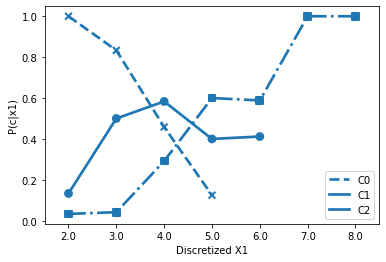

In [ ]:
sns.pointplot(list(unique1_c0),c0p1, linestyles="--",markers =['x'])
sns.pointplot(list(unique1_c1),c1p1,linestyles='-',markers=['o'])
sns.pointplot(list(unique1_c2),c2p1, linestyles="-.",markers =['s'] )
plt.xlabel("Discretized X1")
plt.ylabel("P(c|x1)")
plt.legend(labels = ['C0','C1','C2'])
plt.show()

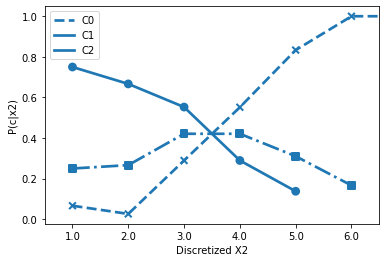

In [ ]:
sns.pointplot(list(unique2_c0),c0p2, linestyles="--",markers =['x'])
sns.pointplot(list(unique2_c1),c1p2,linestyles='-',markers=['o'])
sns.pointplot(list(unique2_c2),c2p2, linestyles="-.",markers =['s'] )
plt.xlabel("Discretized X2")
plt.ylabel("P(c|x2)")
plt.legend(labels = ['C0','C1','C2'])
plt.show()

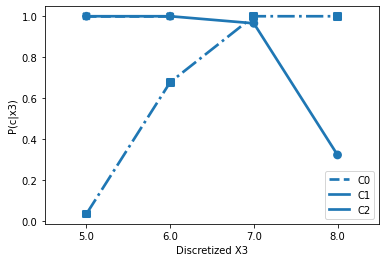

In [ ]:
sns.pointplot(list(unique3_c0),c0p3, linestyles="--",markers =['x'])
sns.pointplot(list(unique3_c1),c1p3,linestyles='-',markers=['o'])
sns.pointplot(list(unique3_c2),c2p3, linestyles="-.",markers =['s'] )
plt.xlabel("Discretized X3")
plt.ylabel("P(c|x3)")
plt.legend(labels = ['C0','C1','C2'])
plt.show()

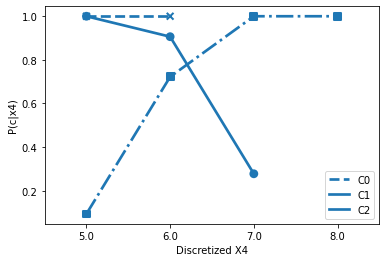

In [ ]:
sns.pointplot(list(unique4_c0),c0p4, linestyles="--",markers =['x'])
sns.pointplot(list(unique4_c1),c1p4,linestyles='-',markers=['o'])
sns.pointplot(list(unique4_c2),c2p4, linestyles="-.",markers =['s'] )
plt.xlabel("Discretized X4")
plt.ylabel("P(c|x4)")
plt.legend(labels = ['C0','C1','C2'])
plt.show()